## Swap Set Analysis
---

In [1]:
import sys, os, json
sys.path.insert(1, "../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdsutils import swap_set_analysis as ssa

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

### Get Data

In [2]:
test_df = pd.read_parquet(os.path.join("s3://sofi-data-science/Risk_DS/rdsutils_data/", "customer_pred_score_rg.parquet"))

In [3]:
test_df.head()

,pred_old,score_old,pred_new,score_new,risk_group_old,risk_group_new,target
12703,0.001044,420.468318,0.014136,501.152627,RG1,RG2,False
17074,0.786693,672.159133,0.965468,734.573168,RG5,RG5,True
19216,0.853470,686.239774,0.964090,733.324311,RG5,RG5,True
31532,0.907194,702.193300,0.973137,742.556065,RG5,RG5,True
37589,0.001542,432.498815,0.082503,557.724063,RG1,RG5,False


### Swap Set Analysis
---


In [4]:
rg1 = "risk_group_old"
rg2 = "risk_group_new"
swapset = ssa.get_swap_set_bad_rate(test_df, rg1, rg2, "target", margins=False)
swapset

risk_group_new,RG1,RG2,RG3,RG4,RG5
risk_group_old,,,,,
RG1,0.000193,0.000271,0.000651,0.000799,0.004427
RG2,0.000085,0.000279,0.000552,0.000634,0.007004
RG3,0.000123,0.000266,0.000939,0.000645,0.012339
RG4,0.000000,0.000433,0.000370,0.000495,0.012869
RG5,0.000000,0.000000,0.000185,0.000793,0.018421


In [5]:
# with margins - total counts
swapset = ssa.get_swap_set_bad_rate(test_df, rg1, rg2, "target", margins=True)
swapset

risk_group_new,RG1,RG2,RG3,RG4,RG5,All
risk_group_old,,,,,,
RG1,0.000193,0.000271,0.000651,0.000799,0.004427,0.000618
RG2,0.000085,0.000279,0.000552,0.000634,0.007004,0.001638
RG3,0.000123,0.000266,0.000939,0.000645,0.012339,0.004342
RG4,0.000000,0.000433,0.000370,0.000495,0.012869,0.006427
RG5,0.000000,0.000000,0.000185,0.000793,0.018421,0.017024
All,0.000155,0.000298,0.000585,0.000659,0.017031,0.011045


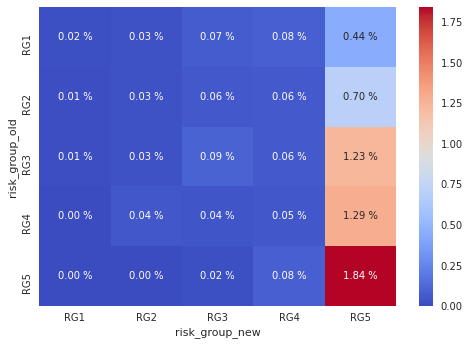

In [6]:
# plotting with percentage annotation
fig, ax = ssa.plot_swap_set_bad_rate(test_df, rg1, rg2, "target", margins=False)

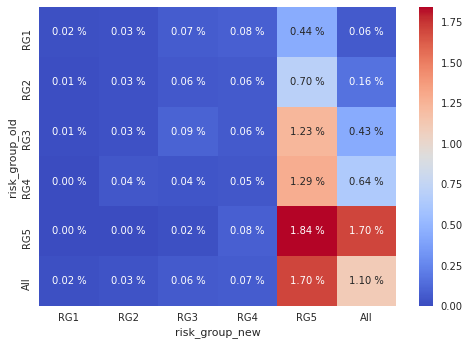

In [7]:
# plotting with percentage annotation
fig, ax = ssa.plot_swap_set_bad_rate(test_df, rg1, rg2, "target", margins=True)

(<Figure size 864x360 with 4 Axes>,
 <AxesSubplot:title={'center':'rg shift: wo margins'}, xlabel='new model', ylabel='incumbent model'>)

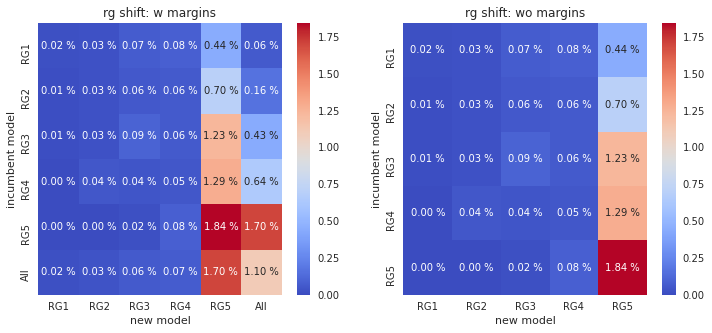

In [8]:
# how to embed in other plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ssa.plot_swap_set_bad_rate(test_df, rg1, rg2, "target", margins=True, fig=fig, ax=axs[0],
                       title="rg shift: w margins",
                       xlabel="new model", ylabel="incumbent model")
ssa.plot_swap_set_bad_rate(test_df, rg1, rg2, "target", margins=False, fig=fig, ax=axs[1],
                       title="rg shift: wo margins",
                       xlabel="new model", ylabel="incumbent model")

### Other Helper Methods

In [9]:
# counts in each segmentation
rg_tbl = ssa.get_swapset_table(test_df, rg1, rg2)
rg_tbl

risk_group_new,RG1,RG2,RG3,RG4,RG5,All
risk_group_old,,,,,,
RG1,36279,11074,9220,5009,4744,66326
RG2,11756,7164,7249,4731,7567,38467
RG3,8137,11269,14907,10852,21395,66560
RG4,1897,6933,16204,18195,40329,83558
RG5,21,440,5419,18909,290538,315327
All,58090,36880,52999,57696,364573,570238


In [10]:
# total number of targets (binary) in each segmentation
tgt_tbl = ssa.get_target_counts_table(test_df, rg1, rg2, "target")
tgt_tbl

risk_group_new,RG1,RG2,RG3,RG4,RG5,All
risk_group_old,,,,,,
RG1,7,3,6,4,21,41
RG2,1,2,4,3,53,63
RG3,1,3,14,7,264,289
RG4,0,3,6,9,519,537
RG5,0,0,1,15,5352,5368
All,9,11,31,38,6209,6298
